In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


In [284]:
data = pd.read_csv("/content/train.csv")
data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [286]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<Axes: >

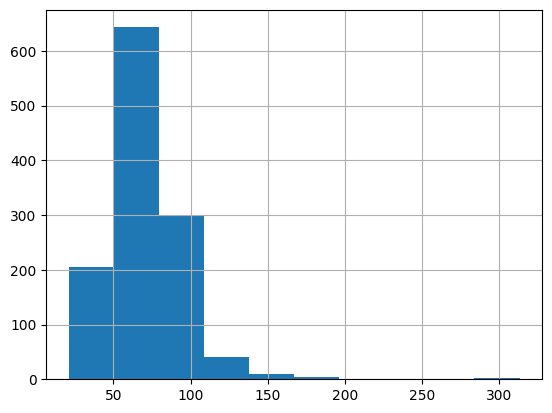

In [287]:
data["LotFrontage"].hist()

In [288]:
median_value = data['LotFrontage'].median()
data['LotFrontage'].fillna(median_value, inplace=True)

In [289]:
data["LotFrontage"].isnull().sum()

0

<Axes: >

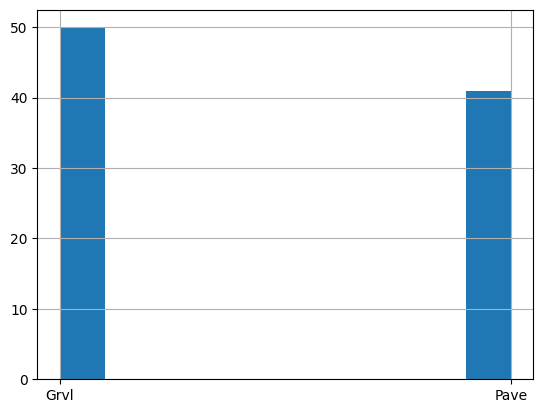

In [290]:
data["Alley"].hist()

In [291]:
data['Alley'].isnull().sum()

1369

In [292]:
# dropped_columns = []  # To store the names of dropped columns

# for col in data.columns:
#     if data[col].isnull().sum() >= 500:
#         dropped_columns.append(col)  # Store the name of the dropped column
#         data.drop(col, axis=1, inplace=True)

# print(f"Dropped Columns: {dropped_columns}")


In [293]:
dropped_columns = []  # To store the names of dropped columns

for col in data.columns:
    null_count = data[col].isnull().sum()
    print(f"Column: {col}, Null Count: {null_count}")

    if null_count >= 500:
        dropped_columns.append(col)  # Store the name of the dropped column
        data.drop(col, axis=1, inplace=True)

print(f"Dropped Columns: {dropped_columns}")


Column: Id, Null Count: 0
Column: MSSubClass, Null Count: 0
Column: MSZoning, Null Count: 0
Column: LotFrontage, Null Count: 0
Column: LotArea, Null Count: 0
Column: Street, Null Count: 0
Column: Alley, Null Count: 1369
Column: LotShape, Null Count: 0
Column: LandContour, Null Count: 0
Column: Utilities, Null Count: 0
Column: LotConfig, Null Count: 0
Column: LandSlope, Null Count: 0
Column: Neighborhood, Null Count: 0
Column: Condition1, Null Count: 0
Column: Condition2, Null Count: 0
Column: BldgType, Null Count: 0
Column: HouseStyle, Null Count: 0
Column: OverallQual, Null Count: 0
Column: OverallCond, Null Count: 0
Column: YearBuilt, Null Count: 0
Column: YearRemodAdd, Null Count: 0
Column: RoofStyle, Null Count: 0
Column: RoofMatl, Null Count: 0
Column: Exterior1st, Null Count: 0
Column: Exterior2nd, Null Count: 0
Column: MasVnrType, Null Count: 8
Column: MasVnrArea, Null Count: 8
Column: ExterQual, Null Count: 0
Column: ExterCond, Null Count: 0
Column: Foundation, Null Count: 0
Co

In [294]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [295]:
data.shape

(1460, 76)

In [296]:
cat_cols_with_missing_values = [col for col in data.select_dtypes(include=['object']) if data[col].isnull().any()]

num_cols_with_missing_values = [col for col in data.select_dtypes(include=['float64','int64']) if data[col].isnull().any()]

print("Categorical columns with missing values",cat_cols_with_missing_values)
print()
print('Numerical columns with missing values',num_cols_with_missing_values)

Categorical columns with missing values ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

Numerical columns with missing values ['MasVnrArea', 'GarageYrBlt']


In [297]:
# handling the missing values in categorical features

for col in cat_cols_with_missing_values:
  data[col].fillna(data[col].mode()[0], inplace=True)

In [298]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [299]:
categorical_columns.isnull().sum()

0

<Axes: >

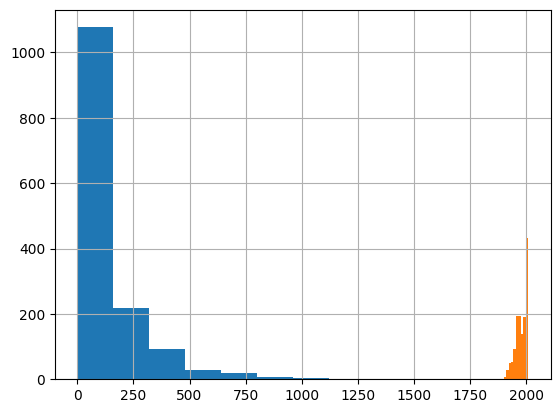

In [300]:
data['MasVnrArea'].hist()

data['GarageYrBlt'].hist()

In [301]:
#filling missing values in MasVnrArea column with its median value

data['MasVnrArea'].fillna(data['MasVnrArea'].median(),inplace = True)
data['MasVnrArea'].isnull().sum()

0

In [302]:
# filling missing values in GarageYrBlt column with the YearBuilt

data['GarageYrBlt'].fillna(data['YearBuilt'], inplace=True)

In [303]:
# checking for any missing values in the entire dataset

sum(data.isnull().sum())

0

In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [305]:
X = data.drop('SalePrice', axis = 1)
y = data['SalePrice']

In [306]:
y = y.astype(int)

In [307]:
X.head(30)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,30,0,320,0,0,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,57,0,0,0,0,0,8,2007,WD,Normal
7,8,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,...,204,228,0,0,0,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,0,205,0,0,0,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,4,0,0,0,0,0,1,2008,WD,Normal


In [308]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [309]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# ordered_rank_features = SelectKBest(score_func = chi2, k = 10)
# ordered_feature = ordered_rank_features.fit(X,y)

<ipython-input-310-a9317df6fd7c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X.corr()


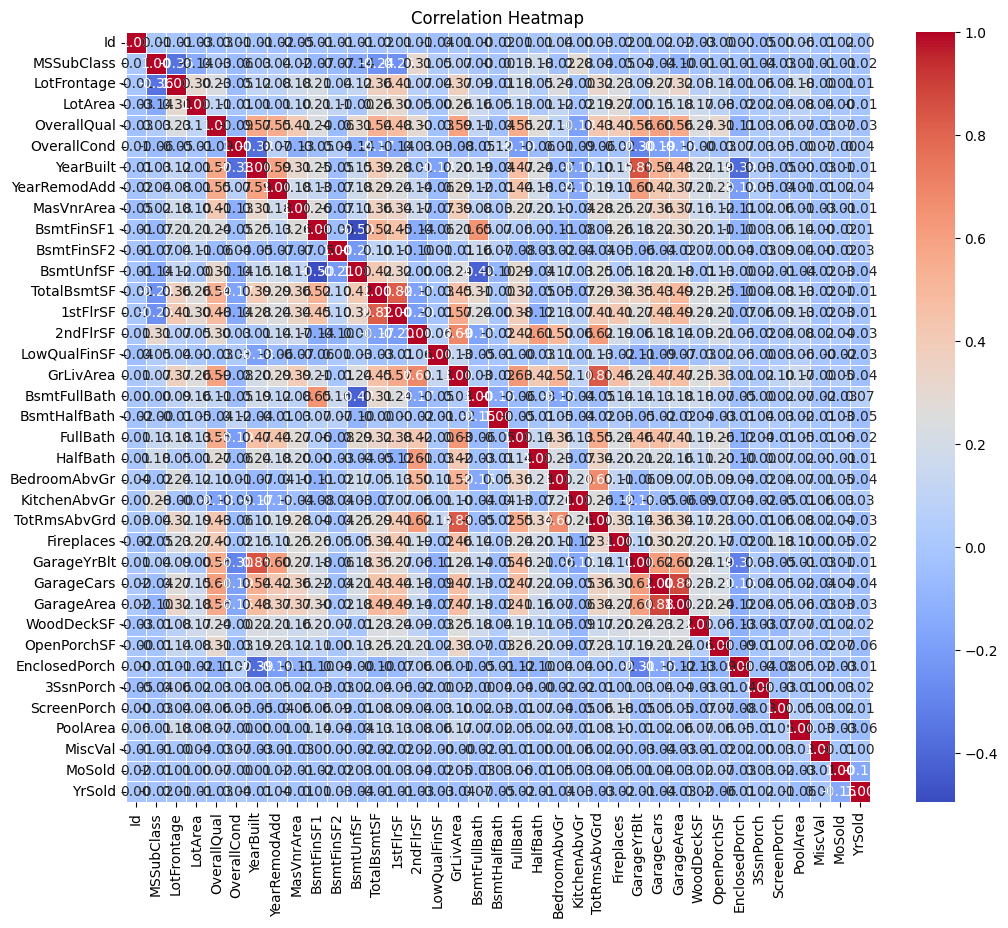

In [310]:
# correlation between the features

correlation_matrix = X.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [311]:
threshold = 0.5

In [312]:
# finding and removing correlated features

def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr


In [313]:
correlation(X,threshold)

<ipython-input-312-adf81f9da87f>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


{'1stFlrSF',
 'BedroomAbvGr',
 'BsmtFullBath',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd'}

In [314]:
# from sklearn.feature_selection import mutual_info_classif

In [315]:
# mutual_info = mutual_info_classif(X,y)

In [316]:
# data['SalePrice'] = np.log1p(data['SalePrice'])

In [317]:
data.set_index('Id', inplace = True)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500


In [318]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [319]:
data_final = data[['CentralAir','MoSold','YrSold','SaleType','SaleCondition','SalePrice']]
data_final.head(20)

,CentralAir,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,
1,Y,2,2008,WD,Normal,208500
2,Y,5,2007,WD,Normal,181500
3,Y,9,2008,WD,Normal,223500
4,Y,2,2006,WD,Abnorml,140000
5,Y,12,2008,WD,Normal,250000
6,Y,10,2009,WD,Normal,143000
7,Y,8,2007,WD,Normal,307000
8,Y,11,2009,WD,Normal,200000
9,Y,4,2008,WD,Abnorml,129900


In [320]:
data_final.isnull().sum()

CentralAir       0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [321]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CentralAir     1460 non-null   object
 1   MoSold         1460 non-null   int64 
 2   YrSold         1460 non-null   int64 
 3   SaleType       1460 non-null   object
 4   SaleCondition  1460 non-null   object
 5   SalePrice      1460 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 79.8+ KB


In [322]:
data_final['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

In [323]:
data_final['SaleType'].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [324]:
data_final['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [325]:
le_CentralAir = LabelEncoder()
data_final['CentralAir'] = le_CentralAir.fit_transform(data_final['CentralAir'])
data_final['CentralAir']

<ipython-input-325-3e26f40d4fe9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['CentralAir'] = le_CentralAir.fit_transform(data_final['CentralAir'])


Id
1       1
2       1
3       1
4       1
5       1
       ..
1456    1
1457    1
1458    1
1459    1
1460    1
Name: CentralAir, Length: 1460, dtype: int64

In [326]:
le_SaleType = LabelEncoder()
data_final['SaleType'] = le_SaleType.fit_transform(data_final['SaleType'])
data_final['SaleType']

<ipython-input-326-fe9fdce6264b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['SaleType'] = le_SaleType.fit_transform(data_final['SaleType'])


Id
1       8
2       8
3       8
4       8
5       8
       ..
1456    8
1457    8
1458    8
1459    8
1460    8
Name: SaleType, Length: 1460, dtype: int64

In [327]:
le_SaleCondition = LabelEncoder()
data_final['SaleCondition'] = le_SaleCondition.fit_transform(data_final['SaleCondition'])
data_final['SaleCondition']

<ipython-input-327-93ff7d4c7fe8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['SaleCondition'] = le_SaleCondition.fit_transform(data_final['SaleCondition'])


Id
1       4
2       4
3       4
4       0
5       4
       ..
1456    4
1457    4
1458    4
1459    4
1460    4
Name: SaleCondition, Length: 1460, dtype: int64

In [328]:
X = data_final.drop("SalePrice", axis = 1)
y = data_final['SalePrice']

In [329]:
X.head()

,CentralAir,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,
1,1,2,2008,8,4
2,1,5,2007,8,4
3,1,9,2008,8,4
4,1,2,2006,8,0
5,1,12,2008,8,4


In [330]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [331]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [332]:

y_pred = model.predict(X_test)


In [333]:

mean_squared_error(y_test, y_pred)


6052193937.661403

In [334]:

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)


56657.98195811929

In [335]:


from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 5, 7, 10],
    'eta': [0.01, 0.05, 0.1],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.25, 0.5, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0]
}

# Initialize the model
model = XGBRegressor()

# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5, verbose=1, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
model_best = XGBRegressor(**best_params)
model_best.fit(X_train, y_train)

# Predict using the best model
y_pred_best = model_best.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred_best)
mae = mean_absolute_error(y_test, y_pred_best)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 3, 'gamma': 1.0, 'eta': 0.05, 'colsample_bytree': 0.5}
Mean Squared Error: 5750793949.020561
Mean Absolute Error: 54941.94930793379


In [336]:

from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=1000, max_depth=7, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

mean_squared_error(y_test, y_pred_rf)


5765557242.283001

In [337]:

mean_absolute_error(y_test, y_pred_rf)


55367.13388860357

In [338]:


from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Initialize the model
model_rf = RandomForestRegressor()

# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=model_rf, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5, verbose=1, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
model_rf_best = RandomForestRegressor(**best_params)
model_rf_best.fit(X_train, y_train)

# Predict using the best model
y_pred_rf_best = model_rf_best.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred_rf_best)
mae = mean_absolute_error(y_test, y_pred_rf_best)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 3}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mean Squared Error: 5783429827.724351
Mean Absolute Error: 55286.34799664014


In [339]:

print(f"XGBoost Regressor Mean Squared Error: {mean_squared_error(y_test, y_pred_best)}")
print(f"Random Forest Regressor Mean Squared Error: {mean_squared_error(y_test, y_pred_rf_best)}")

print("------------------------------------------------------------------------------------------------------")
print(f"XGBoost Regressor Mean Absolute Error: {mean_absolute_error(y_test, y_pred_best)}")
print(f"Random Forest Regressor Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf_best)}")


XGBoost Regressor Mean Squared Error: 5750793949.020561
Random Forest Regressor Mean Squared Error: 5783429827.724351
------------------------------------------------------------------------------------------------------
XGBoost Regressor Mean Absolute Error: 54941.94930793379
Random Forest Regressor Mean Absolute Error: 55286.34799664014


In [340]:
X

,CentralAir,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,
1,1,2,2008,8,4
2,1,5,2007,8,4
3,1,9,2008,8,4
4,1,2,2006,8,0
5,1,12,2008,8,4
...,...,...,...,...,...
1456,1,8,2007,8,4
1457,1,2,2010,8,4
1458,1,5,2010,8,4


In [341]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CentralAir     1460 non-null   int64
 1   MoSold         1460 non-null   int64
 2   YrSold         1460 non-null   int64
 3   SaleType       1460 non-null   int64
 4   SaleCondition  1460 non-null   int64
dtypes: int64(5)
memory usage: 68.4 KB


In [342]:
X['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [343]:
X["YrSold"].unique()

array([2008, 2007, 2006, 2009, 2010])

In [344]:
X = np.array([["Y",6,2008,'WD','Normal']])
X

array([['Y', '6', '2008', 'WD', 'Normal']], dtype='<U21')

In [345]:
X[: ,0] = le_CentralAir.transform(X[: ,0])
X[: ,3] = le_SaleType.transform(X[:,3])
X[: ,4] = le_SaleCondition.transform(X[:,4])
X = X.astype(float)
X

array([[1.000e+00, 6.000e+00, 2.008e+03, 8.000e+00, 4.000e+00]])

In [346]:
y_pred = model_best.predict(X)
y_pred

array([177430.38], dtype=float32)

In [347]:
import pickle

# Save the trained decision tree classifier

data_house_price = {"model" : model_best, "le_CentralAir" : le_CentralAir, "le_SaleType" : le_SaleType, "le_SaleCondition" : le_SaleCondition}
with open('house_price_reg.pkl', 'wb') as file:
    pickle.dump(data_house_price, file)

In [348]:
with open('house_price_reg.pkl', 'rb') as file:
    data_house_price = pickle.load(file)


loaded_model = data_house_price["model"]
le_CentralAir = data_house_price["le_CentralAir"]
le_SaleType = data_house_price["le_SaleType"]
le_SaleCondition = data_house_price["le_SaleCondition"]

In [349]:
y_pred = loaded_model.predict(X)
print(y_pred)

[177430.38]
